In [1]:
import networkx as nx
import osmnx as ox
import pyrosm

In [3]:
G = ox.graph_from_place('Hungary', network_type='drive')

In [10]:
geometry_hun = ox.geometries.geometries_from_place("Hungary", tags={'tourism': True})

In [36]:
def heur_func(tourism_place):
    return 10

In [58]:
s = set()
for x in geometry_hun["tourism"]:
    s.add(x)
s
# ezek lehetnek a tourism tag-hez rendelve

{'alpine_hut',
 'apartment',
 'apartments',
 'aquarium',
 'artwork',
 'attraction',
 'cakeshop',
 'camp_pitch',
 'camp_site',
 'caravan_site',
 'chalet',
 'disused:hotel',
 'gallery',
 'guest_house',
 'hostel',
 'hotel',
 'hunting_lodge',
 'information',
 'lean_to',
 'lovastanya',
 'memorial',
 'motel',
 'museum',
 'nature trail',
 'panorama',
 'picnic_site',
 'proposed',
 'resort',
 'statue',
 'theme_park',
 'viewpoint',
 'wilderness_hut',
 'wine_cellar',
 'winery',
 'yes',
 'zoo'}

In [48]:
def get_tourism_route(source, target, max_dist=200, max_tourism_places=5):
    source_node = ox.nearest_nodes(G, source[0], source[1])
    target_node = ox.nearest_nodes(G, target[0], target[1])
    print(source_node)
    print(target_node)
    route = nx.shortest_path(G, source_node, target_node)
    heuristic_values = {}
    
    # collect near tourist places
    for node in route:
        tourism_places = ox.geometries.geometries_from_point((G.nodes[node]['x'], G.nodes[node]['y']), tags={'tourism': True})
        for tourism_place in tourism_places.iterrows():
            heuristic_values[tourism_place] = heur_func(tourism_place)
    
    sorted_heuristic_values = sorted(heuristic_values, reverse=True)
    route = []
    for i in range(min(max_tourism_places, len(sorted_heuristic_values))):
        tourism_target = sorted_heuristic_values[i]['osmid']
        route += nx.shortest_path(G, source_node, tourism_target)[:-1]
        source_node = tourism_target
    
    route += nx.shortest_path(G, source_node, target_node)
    ox.plot_graph_route(G, route, node_size=0, figsize=(40,40))
    return route
    

3097782728
2619599977


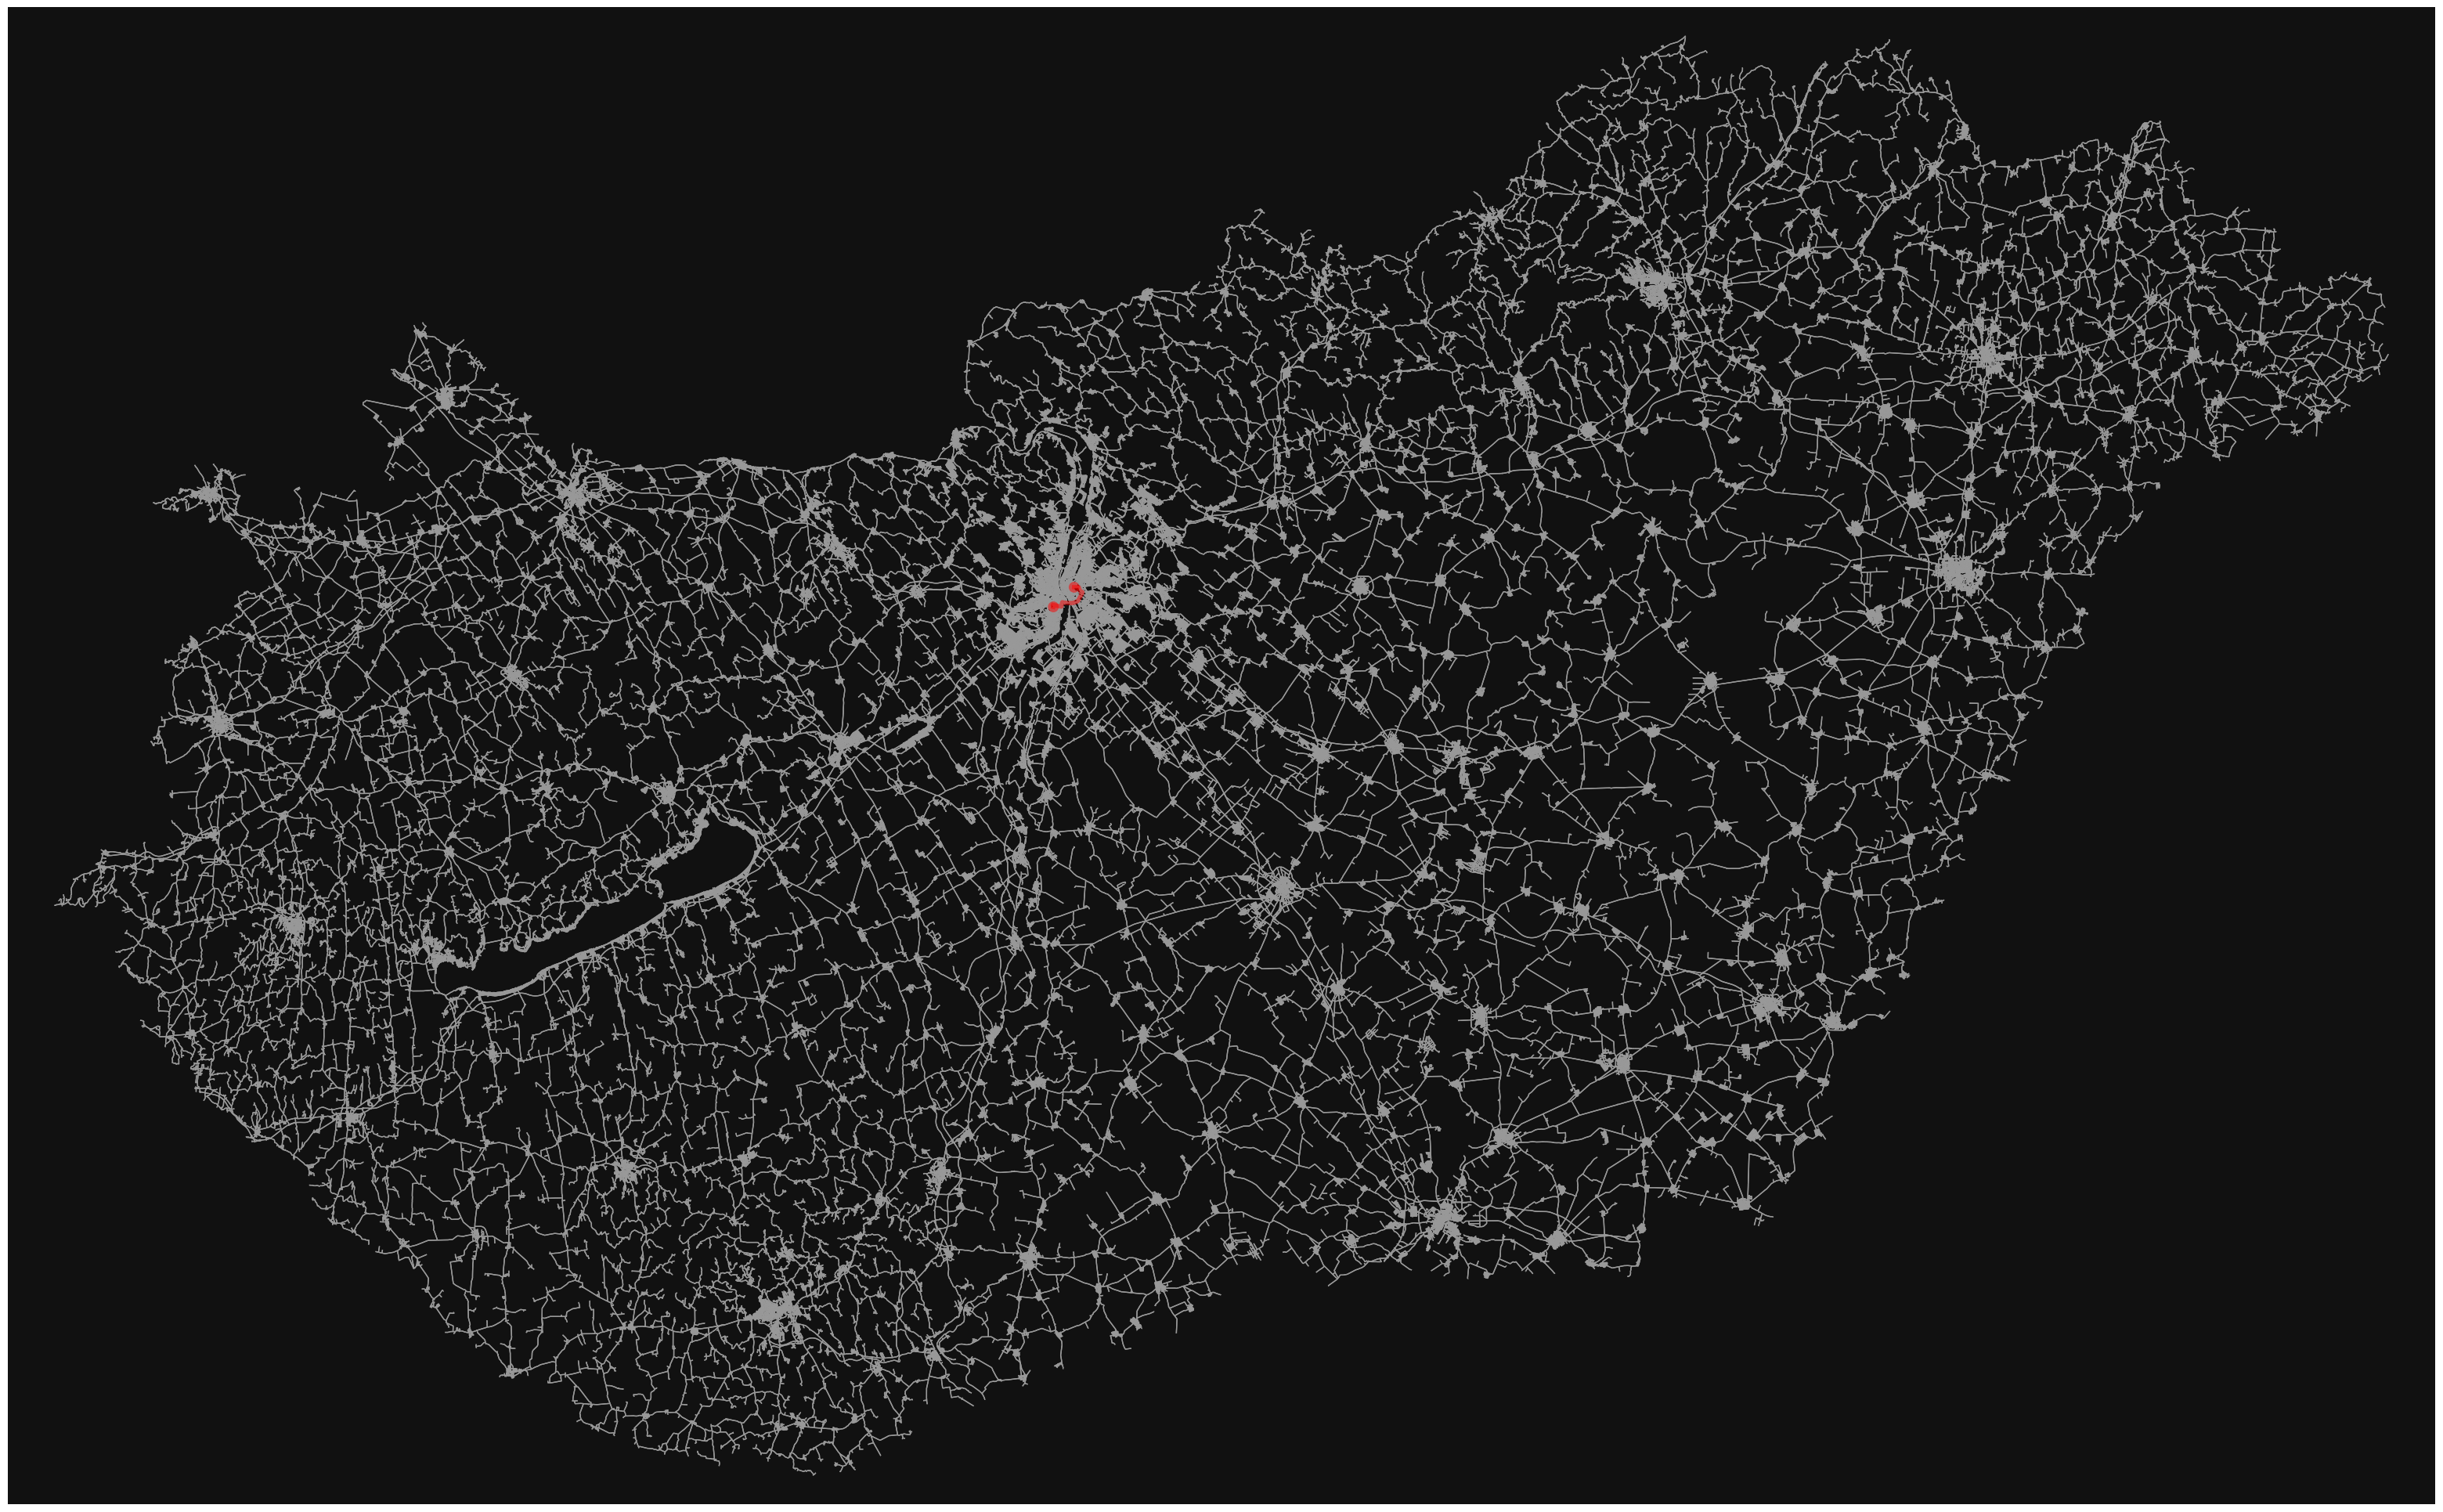

In [49]:
source = (19.022058, 47.461703)
target = (19.088286, 47.499008)

route = get_tourism_route(source, target)

In [47]:
route

[3097782728,
 59768162,
 1811906090,
 1811906093,
 268732979,
 1308092210,
 1308092206,
 59768240,
 2052921652,
 263258025,
 59768247,
 223746850,
 435189038,
 59768256,
 152550350,
 256537955,
 256537844,
 41468928,
 154476503,
 268883048,
 154476505,
 154422835,
 268745520,
 3308156710,
 60760380,
 84696038,
 305190128,
 1408226495,
 305187095,
 60760387,
 280336692,
 60760389,
 694096833,
 652910955,
 130591284,
 151015385,
 1418729903,
 1418729907,
 151015316,
 280186447,
 60760393,
 3309544898,
 110342082,
 60760394,
 365100657,
 1994276657,
 2678873635,
 683359755,
 1103805292,
 1105862988,
 280187764,
 101488262,
 280187760,
 3781632840,
 2619599977]